# Notebook to Look at SMELT merge results 


In [18]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean.cm as cm

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)

%matplotlib inline

In [19]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    dirname = date.strftime('%d%b%y').lower()
    fname = os.path.join(results_dir, dirname,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [38]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

#/data/dlatorne/MEOPAR/results/nowcast-green-west.cloud/28jan17
final = '/data/dlatorne/MEOPAR/results/nowcast-green-west.cloud/'
date = datetime.datetime(2017, 2, 1)
ptrc_T = results_dataset(final, date, 1, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][23, :, :, :]
diatomF = ptrc_T.variables['PHY'][23, :, :, :]
miczF = ptrc_T.variables['MICZ'][23, :, :, :]
title1 = 'westcloud'

initial = '/results/SalishSea/nowcast-green/'
date = datetime.datetime(2017, 2, 1)
ni = results_dataset(initial, date, 1, '1h', 'ptrc_T')
nitrate0 = ni.variables['NO3'][23, :, :, :]
diatom0 = ni.variables['PHY'][23, :, :, :]
micz0 = ni.variables['MICZ'][23, :, :, :]
title0 = 'Salish'

/data/dlatorne/MEOPAR/results/nowcast-green-west.cloud/01feb17/SalishSea_1h_20170201_20170201_ptrc_T.nc
/results/SalishSea/nowcast-green/01feb17/SalishSea_1h_20170201_20170201_ptrc_T.nc


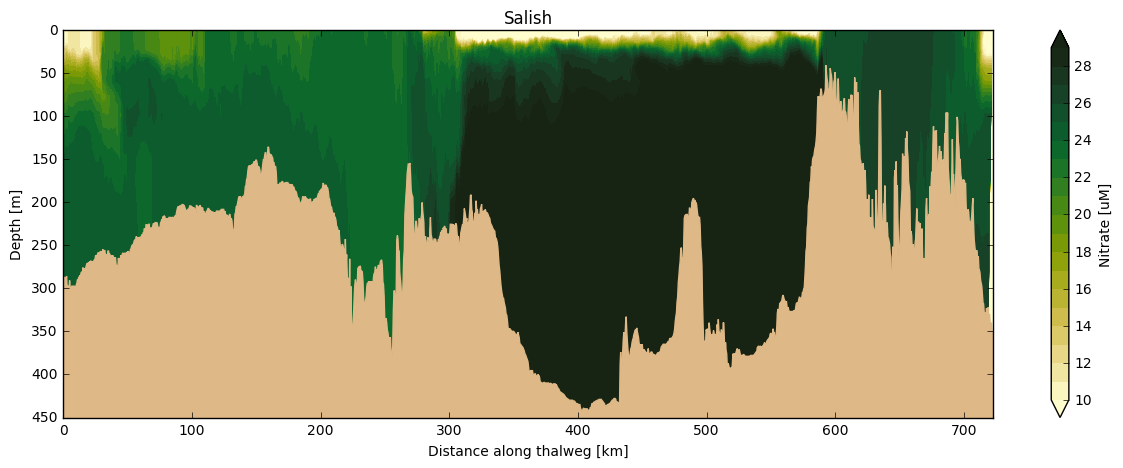

In [21]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(10., 30., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.speed)
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title(title0)

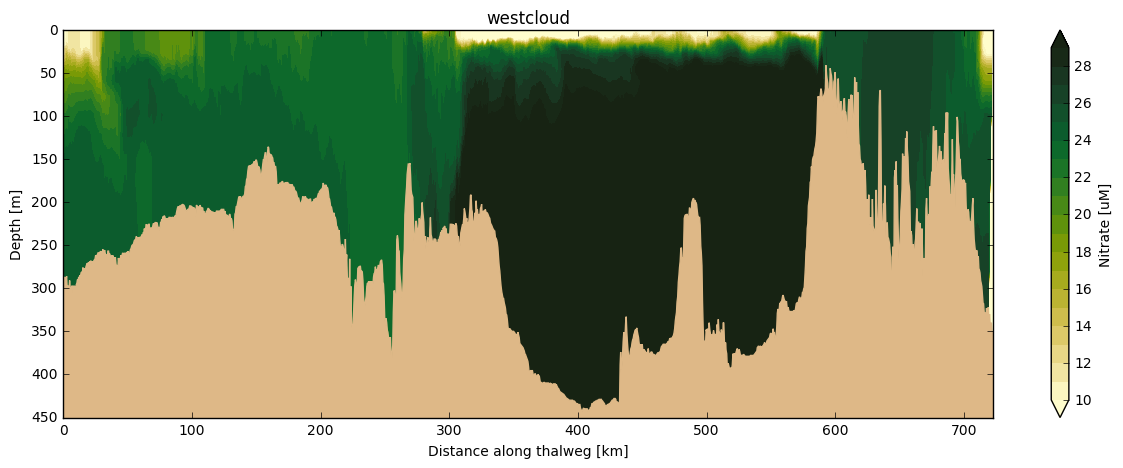

In [22]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.speed)
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title(title1)

Nitrate max 0.422462 min -0.227619


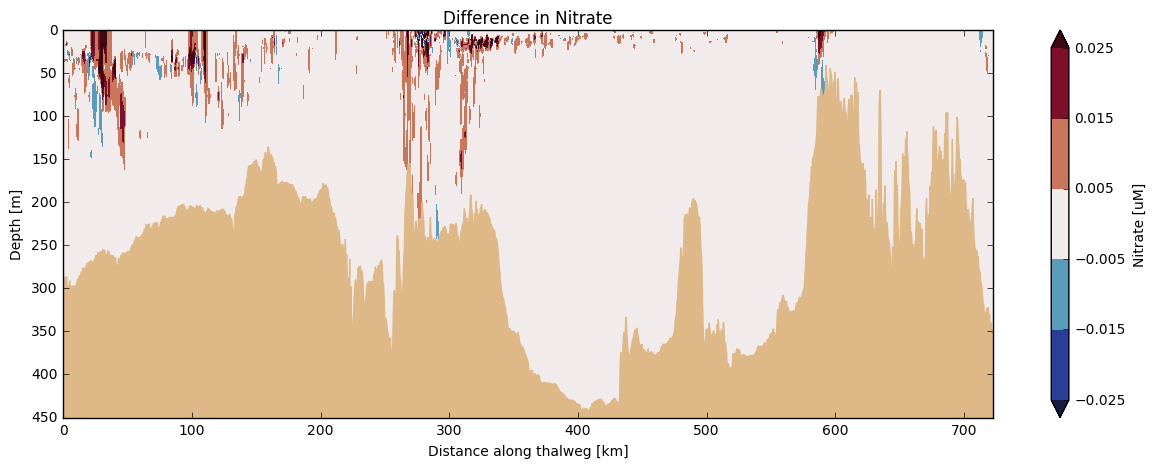

In [23]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.025, -0.015, -0.005, 0.005, 0.015, 0.025]
cbar = vis.contour_thalweg(ax, nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.balance)
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Difference in Nitrate')
print ("Nitrate", 'max', np.max(nitrateF[:,:]-nitrate0[:,:]), 
               'min', np.min(nitrateF[:,:]-nitrate0[:,:]))

Surface Nitrate max 0.137652 min -0.108891


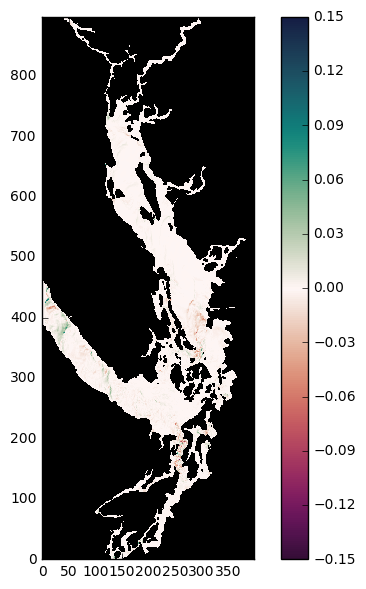

In [31]:
depthlevel = 0
fig, ax = plt.subplots(1, 1, figsize=(7,7))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(nitrateF[0]-nitrate0[0], cmap=cm.curl_r, vmax=0.15, vmin=-0.15)
viz_tools.plot_land_mask(ax, grid_B, isobath=depthlevel)
plt.colorbar(mesh, ax=ax)
print ("Surface Nitrate", 'max', np.max(nitrateF[0,:]-nitrate0[0,:]), 
               'min', np.min(nitrateF[0,:]-nitrate0[0,:]))

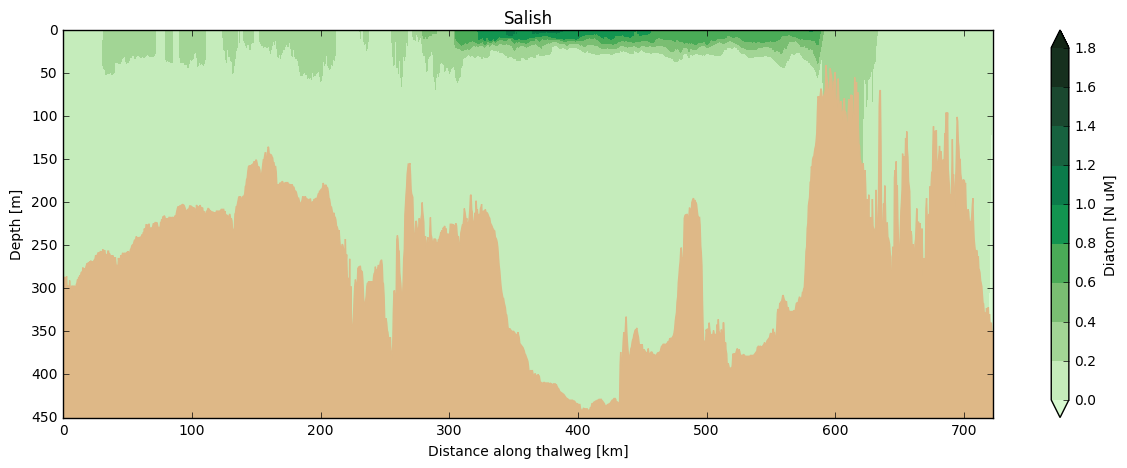

In [32]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 2, 0.2)
cbar = vis.contour_thalweg(ax, diatom0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.algae)
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title(title0)

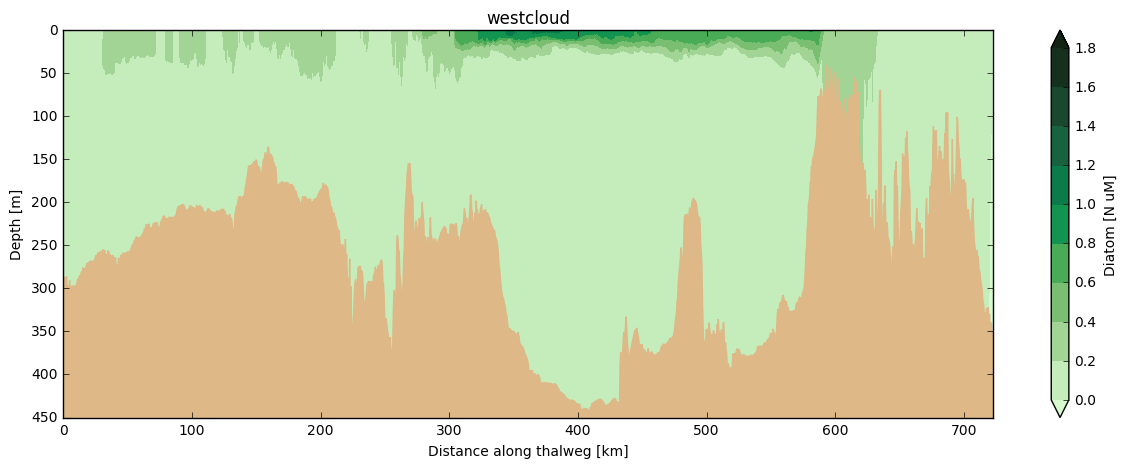

In [33]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 2., 0.2)
cbar = vis.contour_thalweg(ax, diatomF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.algae)
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title(title1)

Diatom max 0.0125307 min -0.0336811


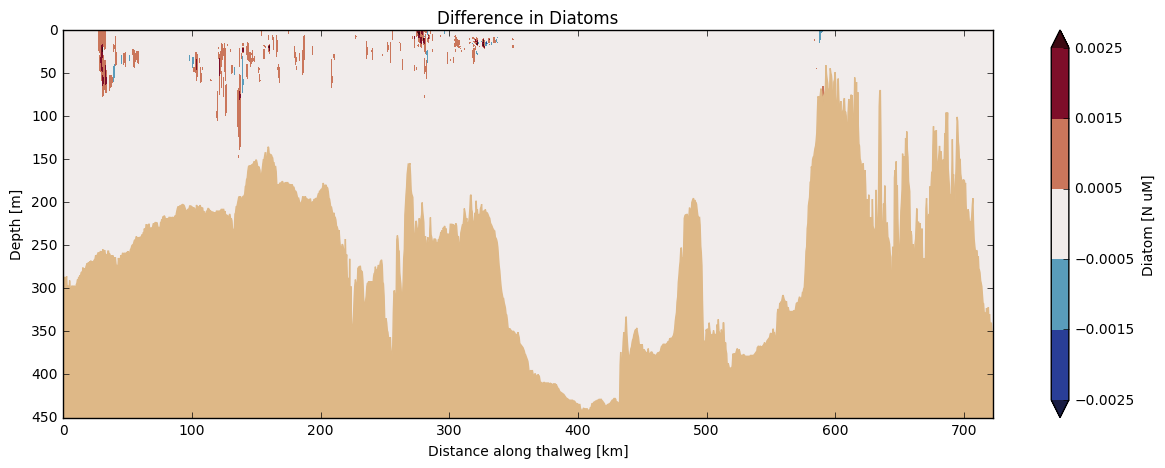

In [34]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.0025, -0.0015, -0.0005, 0.0005, 0.0015, 0.0025]
cbar = vis.contour_thalweg(ax, diatomF-diatom0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.balance)
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title('Difference in Diatoms')
print ("Diatom", 'max', np.max(diatomF[:,:]-diatom0[:,:]), 
               'min', np.min(diatomF[:,:]-diatom0[:,:]))

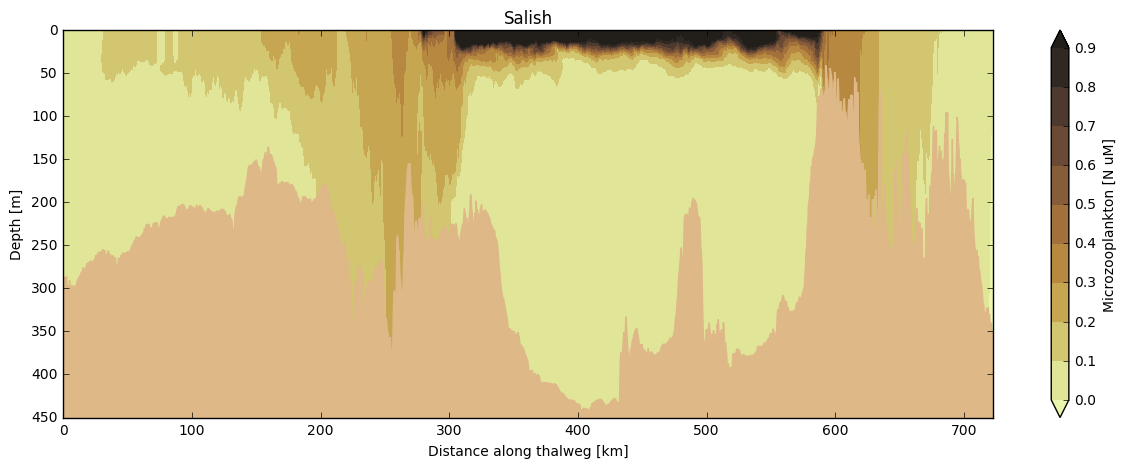

In [35]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 1, 0.1)
cbar = vis.contour_thalweg(ax, micz0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.turbid)
ax.set_ylim([450,0])
cbar.set_label('Microzooplankton [N uM]')
ax.set_title(title0)

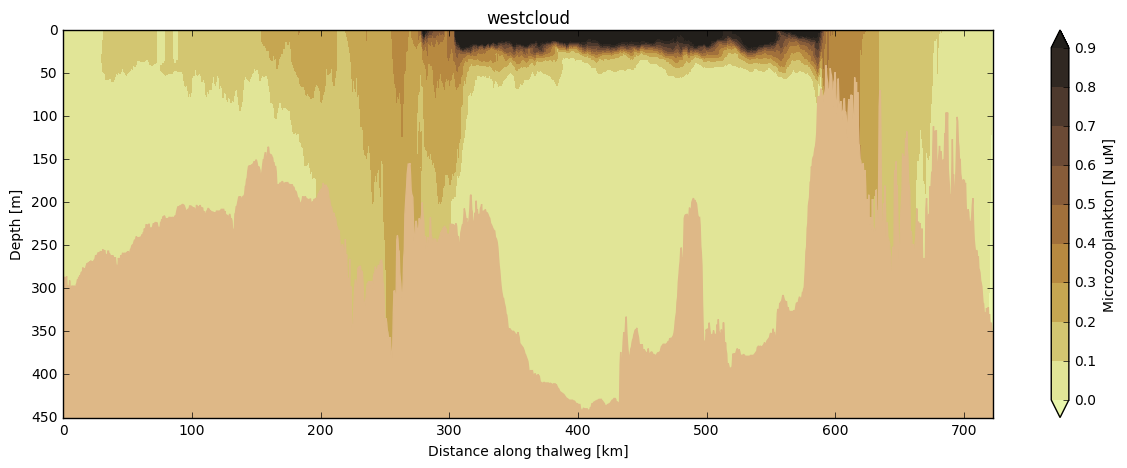

In [36]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 1, 0.1)
cbar = vis.contour_thalweg(ax, miczF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.turbid)
ax.set_ylim([450,0])
cbar.set_label('Microzooplankton [N uM]')
ax.set_title(title1)

Microzooplankton max 0.0157465 min -0.0422483


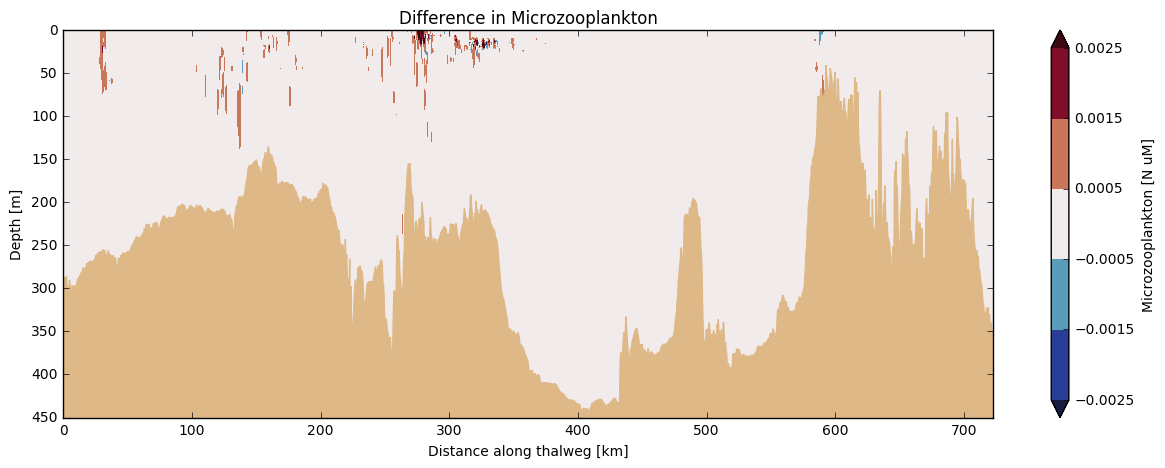

In [37]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.0025, -0.0015, -0.0005, 0.0005, 0.0015, 0.0025]
cbar = vis.contour_thalweg(ax, miczF-micz0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.balance)
ax.set_ylim([450,0])
cbar.set_label('Microzooplankton [N uM]')
ax.set_title('Difference in Microzooplankton')
print ("Microzooplankton", 'max', np.max(miczF[:,:]-micz0[:,:]), 
               'min', np.min(miczF[:,:]-micz0[:,:]))

Nice small differences.

In [39]:
#/data/dlatorne/MEOPAR/results/nowcast-green-west.cloud/28jan17
final = '/data/dlatorne/MEOPAR/results/nowcast-green-west.cloud/'
date = datetime.datetime(2017, 2, 1)
ptrc_T = results_dataset(final, date, 1, '1h', 'grid_T')
salF = ptrc_T.variables['vosaline'][23, :, :, :]
tempF = ptrc_T.variables['votemper'][23, :, :, :]
title1 = 'westcloud'

initial = '/results/SalishSea/nowcast-green/'
date = datetime.datetime(2017, 2, 1)
ni = results_dataset(initial, date, 1, '1h', 'grid_T')
sal0 = ni.variables['vosaline'][23, :, :, :]
temp0 = ni.variables['votemper'][23, :, :, :]
title0 = 'Salish'

/data/dlatorne/MEOPAR/results/nowcast-green-west.cloud/01feb17/SalishSea_1h_20170201_20170201_grid_T.nc
/results/SalishSea/nowcast-green/01feb17/SalishSea_1h_20170201_20170201_grid_T.nc


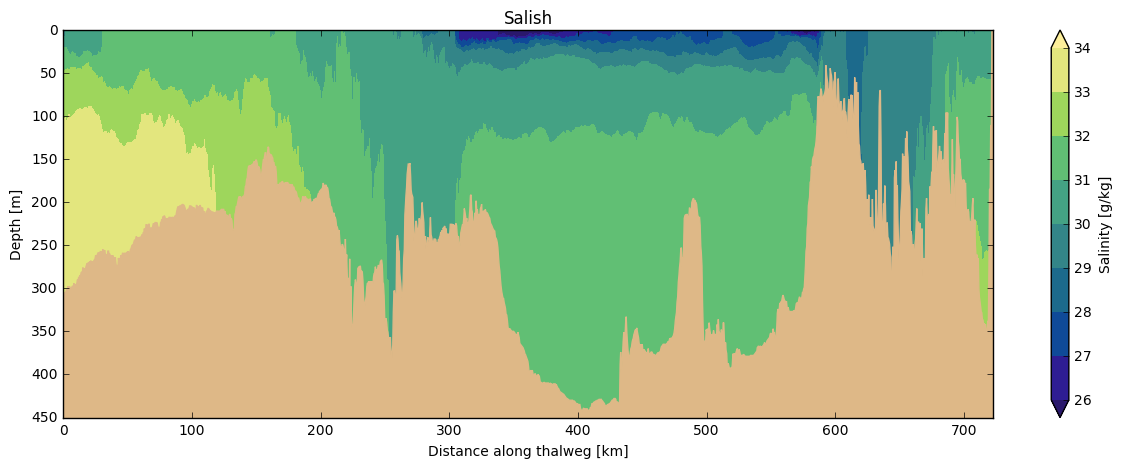

In [42]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(26., 35., 1)
cbar = vis.contour_thalweg(ax, sal0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.haline)
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title(title0)

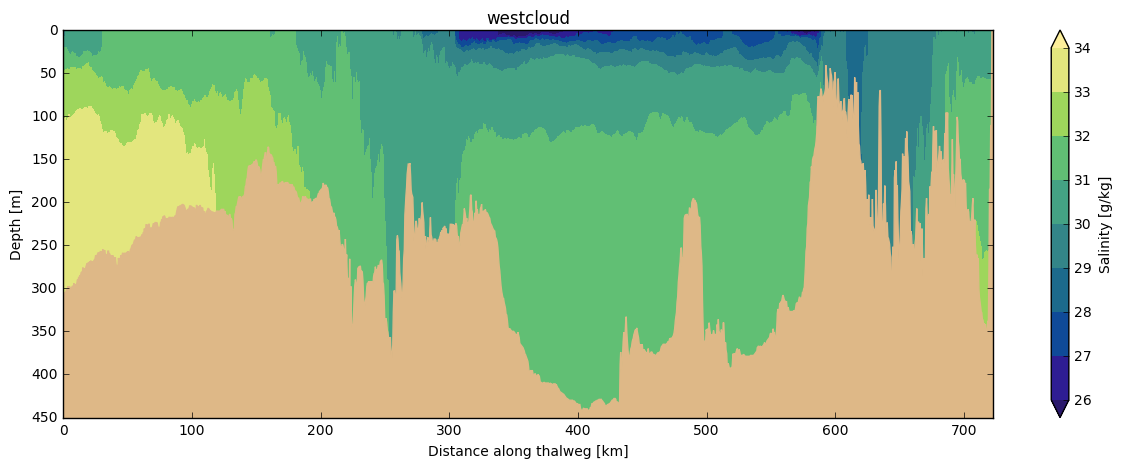

In [45]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(26., 35., 1)
cbar = vis.contour_thalweg(ax, salF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.haline)
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title(title1)

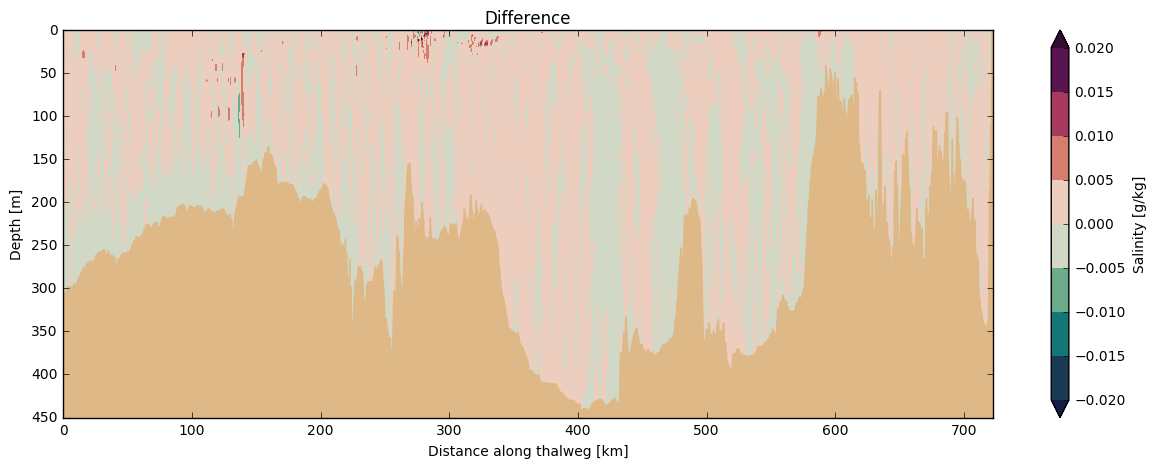

In [52]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(-0.02, 0.025, 0.005)
cbar = vis.contour_thalweg(ax, salF-sal0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.curl)
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title('Difference')

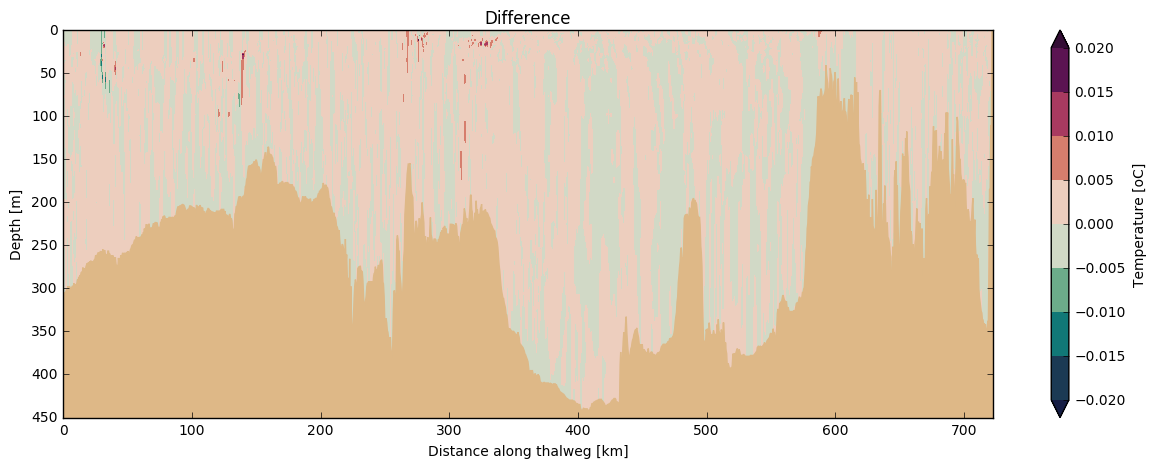

In [53]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(-0.02, 0.025, 0.005)
cbar = vis.contour_thalweg(ax, tempF-temp0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap=cm.curl)
ax.set_ylim([450,0])
cbar.set_label('Temperature [oC]')
ax.set_title('Difference')